# Решение ОДУ первого порядка методами Эйлера, Адамса 3 порядка и Рунге-Кутты 4 порядка

Рассмотрим ОДУ первого порядка

$\begin{cases}
    y'(x) = f(x, y(x))
    \\
    y(x_0)=y_0,
\end{cases}$

Уравнение $y'(x)=f(x, y(x))$ можно проитнегрировать на отрезке $[x_k, x_{k+1}]$<br/>
Получим

$ y(x_{k+1})-y(x_k)=\int\limits_{x_k}^{x_{k+1}} {f(x, y(x))} \,dx $

Пусть $y(x_i)=y_i$, тогда, применяя метод прямоугольников для взятия интеграла, получим:

$ y_{k+1} = y_k + (x_{k+1}-x_k)f(x_k, y_k)$

$ y_{k+1} = y_k + h_kf(x_k, y_k) $ 

Полученная формула представляет из себя <b>явный метод Эйлера</b>, где каждое следующее значение функции выражается через предыдущее

--- 

Метод Адамса является многослойным, то есть для получения следующего значения функции, используется некоторое $n$ предыдущих значений. В зависимости от $n$, погрешность метода Адамса будет равна $O(h^n)$

Так как метод Адамса больше 1 порядка требует нахождение предыдущих значений получаемого решения, для нахождения первых $n-1$ значений используются другие методы. Наиболее точный и простой результат достигается с помощью метода Рунге-Кутты. 

---

Запишем общий вид решения методом Адамса $n$-ого порядка точности:

$ y_{m+1}=y_m+h\sum\limits_{k=1}^{n}C_{m}f(x_{n-m}, y_{n-m}), $

где $C_{m}-$ некоторые константы

---

Вычисление этих констант для метода Адамса 3 порядка опустим и запишем готовое решение:

$ y_{n+1}=y_n+h\left( \frac{23}{12}f(x_n,y_n) - \frac{16}{12}f(x_{n-1},y_{n-1}) + \frac{5}{12}f(x_{n-2},y_{n-2}) \right) $

---

Перейдём к наиболее точному в этой работе методу $-$ методу Рунге-Кутты 4 порядка

Будем рассматривать явный метод Рунге-Кутты, общий вид которого записывается следующим образом:

$ y_{n+1}=y_n + h\sum\limits_{i=0}^{s}b_ik_i, $

$h$ $-$ длина шага, $s$ $-$ количество этапов вычисления следующего значения. При этом:

$ k_1=f(x_n, y_n) $ <br/>
$ k_2=f(x_n+c_2h,y_n+a_{21}hk_1) $ <br/>
$ ... $ <br/>
$ k_s=f(x_n+c_sh,y_n+a_{s1}hk_1+a_{s2}hk_2+...+a_{s,s-1}hk_{s-1}) $ 

$a_{ij}, c_i, b_i$ $-$ константы

---

Вычисление этих коэффициентов для метода Рунге-Кутты 4 порядка опустим и запишем полученное решение:

$ y_{n+1}=y_n+\frac{h}{6}\left( k_1 + 2k_2 + 2k_3 + k_4 \right) $

$ k_1 = f(x_n, y_n) $ <br/>
$ k_2 = f(x_n+\frac{h}{2}, y_n+\frac{h}{2}k_1) $ <br/>
$ k_3 = f(x_n+\frac{h}{2}, y_n+\frac{h}{2}k_2) $ <br/>
$ k_4 = f(x_n+h, y_n+hk_3) $

---

Зададим параметры среды и условия для нашего ОДУ

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sympy import *

#-------------------------------------------------------

plt.style.use('classic')
plt.style.use('dark_background')

#-------------------------------------------------------

x0 = 0
y0 = 0
yprime0 = 2
x_start = 0
x_end = 1

h = 0.05

Запишем нашу функцию $y''(x) + p(x)y' + q(x)y = f(x)$

$y''(x)=-p(x)y'-q(x)y+f(x)$

In [2]:
def p(x):
    return 1 / (1 + x)

def q(x):
    return 2 / (cosh(x) * cosh(x))

def f(x):
    return (1 / (cosh(x) * cosh(x))) * ( 1 / (1 + x) + 2 * log(1 + x))

def init_func(x, y, z):
    return f(x) - p(x) * z - q(x) * y

Реализуем методы Эйлера, Адаса 3 порядка и Рунге-Кутты 4 порядка

In [3]:
def Euler(n, h, x=x0, y=y0, yprime=yprime0):
    for i in range(n):
        yprime += h * init_func(x, y, yprime)
        y += h * yprime
        x += h
    return y, yprime

#-------------------------------------------------------

def Runge_Cutta(n, h, x=x0, y=y0, yprime=yprime0):
    for i in range(n):
        q1 = init_func(x, y, yprime)
        k1 = yprime
        
        q2 = init_func(x + h/2, y + h * k1 / 2, yprime + h * q1 / 2)
        k2 = yprime + q1 * h / 2
        
        q3 = init_func(x + h/2, y + h * k2 / 2, yprime + h * q2 / 2)
        k3 = yprime + q2 * h / 2
        
        q4 = init_func(x + h, y + h * k3, yprime + h * q3)
        k4 = yprime + q3 * h
        
        yprime += h * (q1 + 2*q2 + 2*q3 + q4) / 6
        y += h * (k1 + 2*k2 + 2*k3 + k4) / 6
        x += h
        
    return y, yprime

#-------------------------------------------------------

def Adams(n, h, x=x0, y=y0, yprime=yprime0):
    y1, yprime1 = Runge_Cutta(1, h, x, y, yprime)
    y2, yprime2 = Runge_Cutta(2, h, x, y, yprime)

    if n == 0:
        return y, yprime
    elif n == 1:
        return y1, yprime1
    elif n == 2:
        return y2, yprime2

    for i in range(n - 2):
        q3 = 5 * init_func(x, y, yprime)
        q2 = (-16) * init_func(x + h, y1, yprime1)
        q1 = 23 * init_func(x + 2*h, y2, yprime2)
        
        k3 = 5 * yprime
        k2 = (-16) * yprime1
        k1 = 23 * yprime2
        
        yprime = yprime1
        yprime1 = yprime2
        yprime2 += h * (q1 + q2 + q3) / 12
        
        y = y1
        y1 = y2
        y2 += h * (k1 + k2 + k3) / 12
        
        x += h
    return y2, yprime2

Реальное решение для нашего ОДУ имеет вид:

$ y(x) = ln(1+x)+th(x)$

In [4]:
def real_func(x):
    return ln(1 + x) + tanh(x)

Также реализуем Правило Рунге для дальнейшей оценки точности полученных нами решений ОДУ

In [5]:
# Функция ошибки находит максимум модуля разности реального решения и полученного
def err(n, h = h, func=Runge_Cutta):
    errors = []
    for i in range(n):
        y1, prime1 = func(i, h, x0, y0, yprime0)
        errors.append(abs(real_func(x0 + i * h) - y1))
    return max(errors)

# Правило Рунге позволяет оценить точность полученного решения ОДУ 
def RungeRule(n, h, p, func=Runge_Cutta):
    err1 = err(n, h, func)
    err2 = err(2*n, h / 2, func)
    return abs(err1 - err2) / (2**p - 1)

Нарисуем полученные решениия методом Эйлера и Рунге-Кутты 4 порядка с шагом $0.05$ на отрезке $[0, 1]$

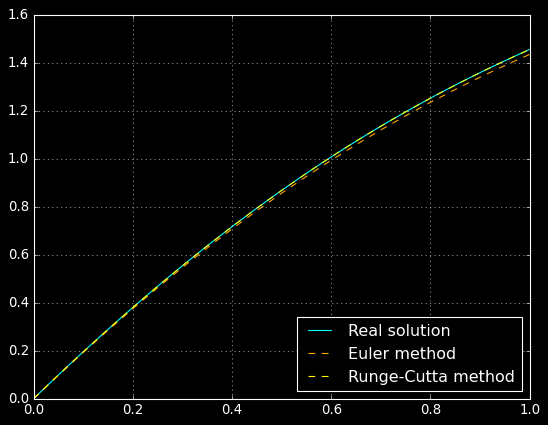

In [6]:
X = [x0 + i / 1000 for i in range(1000)]
Yr = [real_func(i) for i in X]
plt.plot(X, Yr, color="aqua", label="Real solution")

X = [x0 + i * h for i in range(21)]
YE = []
for i in range(21):
    ye, yeprime = Euler(i, h, x0, y0, yprime0)
    YE.append(ye)
plt.plot(X, YE, linestyle="--", color="orange", label="Euler method")

YRC = []
for i in range(21):
    yrc, yrcprime = Runge_Cutta(i, h, x0, y0, yprime0)
    YRC.append(yrc)
plt.plot(X, YRC, linestyle="--", color="yellow", label="Runge-Cutta method")

#Ye = [abs(Y[i] - Yr[i]) for i in range(1000)]
#plt.plot(X, Ye, label="Error")

plt.legend(loc="lower right")
plt.grid(True)

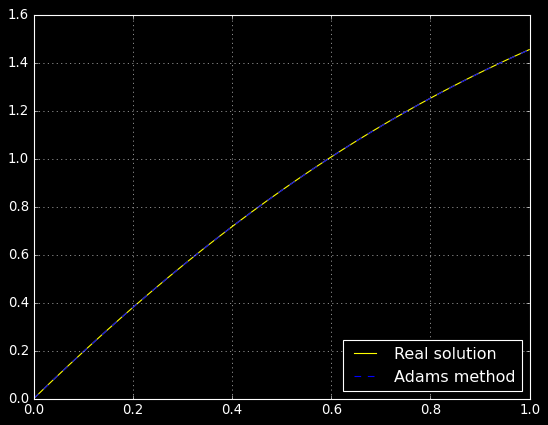

In [7]:
X = [x0 + i / 1000 for i in range(1000)]
Yr = [real_func(i) for i in X]
plt.plot(X, Yr, color="yellow", label="Real solution")

X = [x0 + i * h for i in range(21)]
YA = [] 
for i in range(21):
    ya, yaprime = Adams(i, h, x0, y0, yprime0)
    YA.append(ya)
plt.plot(X, YA, linestyle="--", color="blue", alpha=1, label="Adams method")

plt.legend(loc="lower right")
plt.grid(True)

In [8]:
def EulerFull(n, h, x=x0, y=y0, yprime=yprime0):
    Y, Yprime = [y], [yprime]
    for i in range(n):
        yprime += h * init_func(x, y, yprime)
        y += h * yprime
        x += h
        Y.append(y)
        Yprime.append(yprime)
    return Y, Yprime

#-------------------------------------------------------

def Runge_CuttaFull(n, h, x=x0, y=y0, yprime=yprime0):
    Y, Yprime = [y], [yprime]
    for i in range(n):
        q1 = init_func(x, y, yprime)
        k1 = yprime
        
        q2 = init_func(x + h/2, y + h * k1 / 2, yprime + h * q1 / 2)
        k2 = yprime + q1 * h / 2
        
        q3 = init_func(x + h/2, y + h * k2 / 2, yprime + h * q2 / 2)
        k3 = yprime + q2 * h / 2
        
        q4 = init_func(x + h, y + h * k3, yprime + h * q3)
        k4 = yprime + q3 * h
        
        yprime += h * (q1 + 2*q2 + 2*q3 + q4) / 6
        y += h * (k1 + 2*k2 + 2*k3 + k4) / 6
        x += h
        
        Y.append(y)
        Yprime.append(yprime)
        
    return Y, Yprime

#-------------------------------------------------------

def AdamsFull(n, h, x=x0, y=y0, yprime=yprime0):
    Y = [y]
    Yprime = [yprime]
    Y1, Yprime1 = Runge_CuttaFull(1, h, x, y, yprime)
    Y2, Yprime2 = Runge_CuttaFull(2, h, x, y, yprime)
    
    y1 = Y1[-1]
    y2 = Y2[-1]
    yprime1 = Yprime1[-1]
    yprime2 = Yprime2[-1]
    
    #Y.append(y1)
    #Y.append(y2)
    #Yprime.append(yprime1)
    #Yprime.append(yprime2)
    
    if n == 0:
        return [y], [yprime]
    elif n == 1:
        return Y1, Yprime1
    elif n == 2:
        return Y2, Yprime2

    for i in range(n - 2):
        q3 = 5 * init_func(x, y, yprime)
        q2 = (-16) * init_func(x + h, y1, yprime1)
        q1 = 23 * init_func(x + 2*h, y2, yprime2)
        
        k3 = 5 * yprime
        k2 = (-16) * yprime1
        k1 = 23 * yprime2
        
        yprime = yprime1
        yprime1 = yprime2
        yprime2 += h * (q1 + q2 + q3) / 12
        
        y = y1
        y1 = y2
        y2 += h * (k1 + k2 + k3) / 12
        
        Y.append(y)
        Yprime.append(yprime)
        
        x += h
    Y.append(y1)
    Y.append(y2)
    Yprime.append(yprime1)
    Yprime.append(yprime2)
    return Y, Yprime


def log_graph(method):
    errH = []
    errY = []
    for n in range(10, 300, 50):
        h = (1 - 0) / n
        X = np.linspace(0, 1, n + 1)
        Y, Yprime = method(n, h)
        tmp = [abs(Y[i] - real_func(X[i])) for i in range(n)]
        errY.append(log(max(tmp)))
        errH.append(log(h))
    return errH, errY

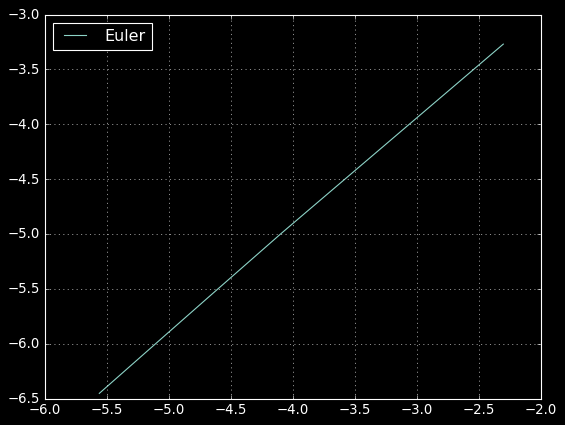

In [9]:
errH, errY = log_graph(EulerFull)
plt.plot(errH, errY, label="Euler")
plt.grid(True)
plt.legend(loc="upper left")

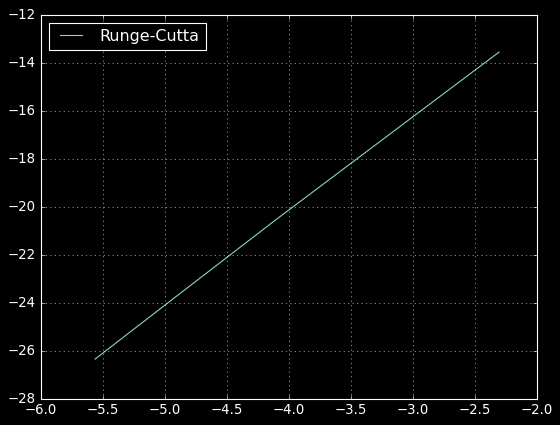

In [10]:
errH, errY = log_graph(Runge_CuttaFull)
plt.plot(errH, errY, label="Runge-Cutta")
plt.grid(True)
plt.legend(loc="upper left")

In [11]:
errH, errY = log_graph(AdamsFull)

Также не забудем о решение с помощью метода Адамса 3 порядка

In [12]:
n = 1000
X = np.linspace(0, 1, n + 1)
print(X)
YA, eee = AdamsFull(n + 1, 1 / n)
errYA = [abs(real_func(X[i]) - YA[i]) for i in range(n + 1)]

# plt.plot(X, errYA, label="Adams error")
# plt.grid(True)

[0.    0.001 0.002 ... 0.998 0.999 1.   ]


Воспользуемся правилом Рунге для наших трёх методов и найдём ошибку после применения поправки Рунге

0.0   4.257e-9   7.635e-9   9.967e-9   1.1079e-8   1.0827e-8   9.126e-9   5.956e-9   1.368e-9   -4.524e-9   -1.1556e-8   -1.9527e-8   -2.8217e-8   -3.7399e-8   -4.6855e-8   -5.6383e-8   -6.5809e-8   -7.4984e-8   -8.3794e-8   -9.2151e-8   -9.9997e-8   


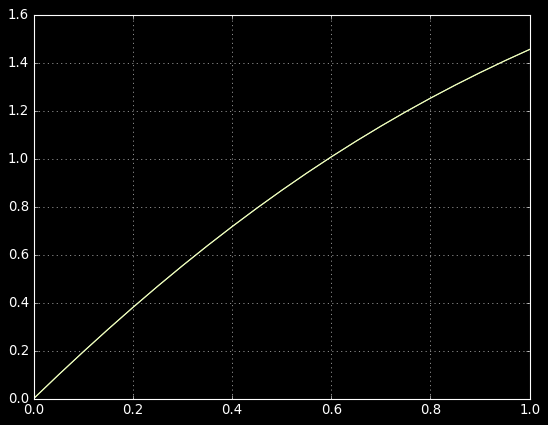

In [13]:
def ruleRunge(n, h, p, method, x=x0, y=y0, yprime=yprime0):
    methodY_h1, grb = method(n, h, x, y, yprime)
    methodY_h2, grb = method(2*n, h/2, x, y, yprime)
    
    resY = []
    for i in range(len(methodY_h1)):
        resY.append((2**p * methodY_h2[2*i] - methodY_h1[i]) / (2**p - 1))
    return resY

n = 20
X = np.linspace(0, 1, n+1)
Xextended = np.linspace(0, 1, n + 1)
Y, grb = Runge_CuttaFull(n, 1 / n)
YwithRunge = ruleRunge(n, 1 / n, 4, Runge_CuttaFull)
for i in [YwithRunge[i] - Y[i] for i in range(len(Y))]:
    print(round(i, 12), end="   ")
print()
plt.plot(Xextended, Y, )
plt.plot(Xextended, YwithRunge)
plt.grid(True)

In [14]:
def log_graph_with_Runge(method, p):
    errH = []
    errY = []
    for n in range(10, 300, 50):
        h = (1 - 0) / n
        X = np.linspace(0, 1, n + 1)
        Y = ruleRunge(n, h, p, method)
        tmp = [abs(Y[i] - real_func(X[i])) for i in range(n + 1)]
        errY.append(log(max(tmp)))
        errH.append(log(h))
    return errH, errY

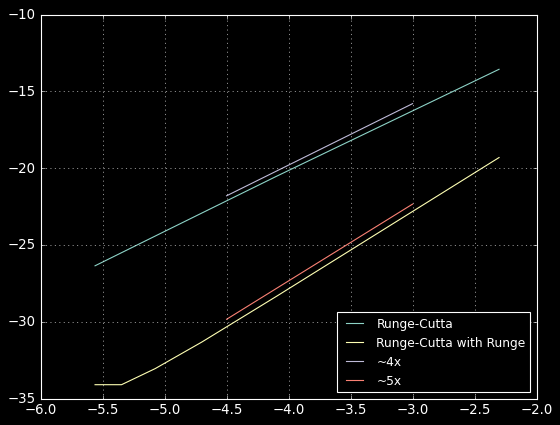

In [15]:
errH1, errY1 = log_graph(Runge_CuttaFull)
errH2, errY2 = log_graph_with_Runge(Runge_CuttaFull, 4)

plt.plot(errH1, errY1, label="Runge-Cutta")
plt.plot(errH2, errY2, label="Runge-Cutta with Runge")
plt.grid(True)

def ff(x):
    return 4*x - 3.8

def fff(x):
    return 5*x - 7.34

x = np.linspace(-4.5, -3, 100)
plt.plot(x, ff(x), label="~4x")
plt.plot(x, fff(x), label="~5x")

plt.legend(loc="lower right", fontsize=11)

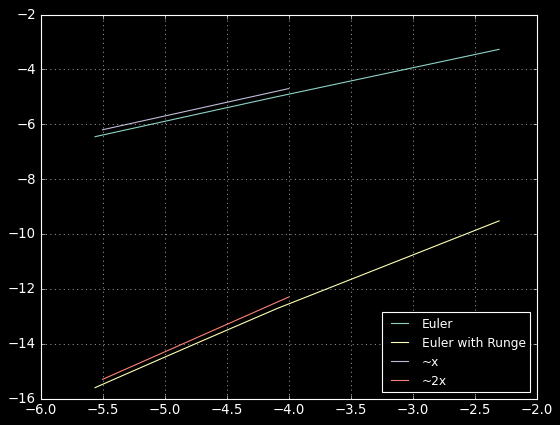

In [20]:
# errH3, errY3 = log_graph(EulerFull)
# errH4, errY4 = log_graph_with_Runge(EulerFull, 1)

plt.plot(errH3, errY3, label="Euler")
plt.plot(errH4, errY4, label="Euler with Runge")
plt.grid(True)

def ff(x):
    return x - 0.7

def fff(x):
    return 2*x - 4.3

x = np.linspace(-5.5, -4, 100)
plt.plot(x, ff(x), label="~x")
plt.plot(x, fff(x), label="~2x")

plt.legend(loc="lower right", fontsize=11)

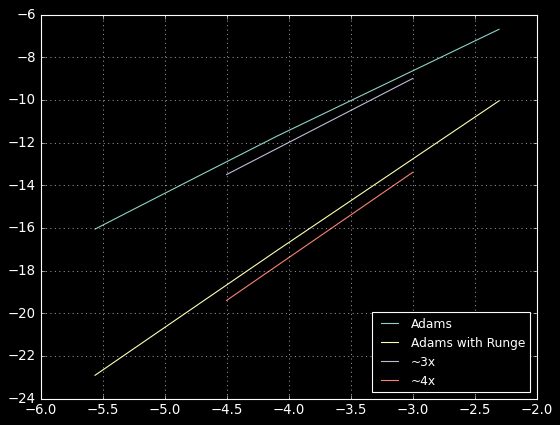

In [17]:
errH5, errY5 = log_graph(AdamsFull)
errH6, errY6 = log_graph_with_Runge(AdamsFull, 3)

plt.plot(errH5, errY5, label="Adams")
plt.plot(errH6, errY6, label="Adams with Runge")
plt.grid(True)

def ff(x):
    return 3*x

def fff(x):
    return 4*x - 1.4

x = np.linspace(-4.5, -3, 100)
plt.plot(x, ff(x), label="~3x")
plt.plot(x, fff(x), label="~4x")

plt.legend(loc="lower right", fontsize=11)